In [76]:
import pandas as pd
import os
import numpy as np

In [12]:
df = pd.read_csv('data/Boston.csv')
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [70]:
from sklearn.linear_model import LinearRegression

# reshape data
y = df['medv'].to_numpy().reshape((-1, 1)) 
x = df['lstat'].to_numpy().reshape((-1, 1))

sk_reg = LinearRegression().fit(x, y)

In [71]:
print(sk_reg.coef_, sk_reg.intercept_) # format of regression
print(sk_reg.predict(np.array([[0]]))) # prediction

[[-0.95004935]] [34.55384088]
[[34.55384088]]


In [72]:
print(sk_reg.get_params(deep=True)) # list of params
print(sk_reg.score(x, y)) # R^2 value

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}
0.5441462975864799


In [73]:
import matplotlib as mpl
import matplotlib.pyplot as plt

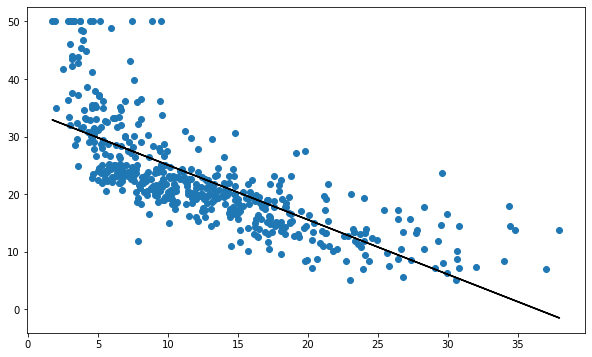

In [136]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.plot(x, sk_reg.predict(x), color='k') # plot predictions

In [135]:
residual = y - sk_reg.predict(x)
residual_df = pd.DataFrame(residual)
residual_df.columns = ['residuals']
print(residual_df.describe())

          residuals
count  5.060000e+02
mean  -8.593916e-15
std    6.209603e+00
min   -1.516745e+01
25%   -3.989612e+00
50%   -1.318186e+00
75%    2.033701e+00
max    2.450013e+01


In [65]:
import statsmodels.api as sm

In [144]:
x_with_intercept = np.hstack((np.ones_like(x), x)) # sm.add_constant(x) also works
sm_reg = sm.OLS(y, x_with_intercept)
results = sm_reg.fit()
print(results.summary())
# notes on these results
# degrees of freedom: n - p - 1, p = 1 in this case
# adj. R-squared, you adjust by degrees of freedom when dividing RSS over TSS
# omnibus, tests all the statistics at once
# skew is third moment, kurtosis is second moment
# cond. no: condition number, which talks about multicollinearity (matrix is close to singular if this is high)
# durbin-watson and jarque-bera are probably unnecessary to know about
# AIC: estimate for test error curve
# BIC: another estimate for test error, but using Bayesian approach, lowest BIC means highest posterior probability
# BIC penalizes more complex models because of log N in front of degrees of freedom term
# F statistic comes from F distribution, which models ratio of two chi-squared distributions, but not fully sure what this one means
# the [0.025, 0.975] is just a 95% confidence interval

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           5.08e-88
Time:                        19:24:16   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

In [142]:
identity = np.identity(len(results.params))
print(results.f_test(identity)) # testing F-test for R x beta = 0 if we do results.f_test(R)
print(results.f_test('x1 = const = 0')) # symbolic F-test
# Here, we see that the intercept-only model is very terrible, the null hypothesis has a tiny p-value

<F test: F=3625.5862108441324, p=6.84617149024746e-300, df_denom=504, df_num=2>
<F test: F=3625.5862108441142, p=6.846171490255244e-300, df_denom=504, df_num=2>


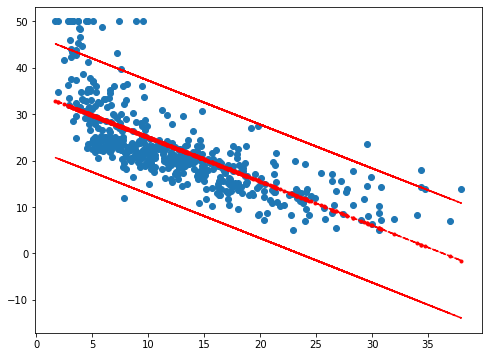

In [143]:
pred = results.get_prediction()
pred_summary = pred.summary_frame() # summary of the predictions
lower = pred_summary['obs_ci_lower']
upper = pred_summary['obs_ci_upper']

# prediction intervals are where a prediction will probably fall within a certain probability

# plot prediction intervals
fig, ax = plt.subplots(figsize=(8, 6)) 
ax.plot(x, y, 'o', label='data')
ax.plot(x, results.predict(), 'r--.', label='OLS')
ax.plot(x, lower, "r--")
ax.plot(x, upper, "r--")